# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : IF7 - Math
- Anggota : </br>
10122235 - Ryuna Aurelia Putri</br>
10122247 - Rania Shahimaz</br>
10122253 - Hana Mar'atul Afifah Rambe</br>
10122258 - Indri Tri Puspita</br>
10122481 - Ariska Diyangku Suwandi Hilala

## Menentukan Pertanyaan Bisnis

1. Apakah ada pola tertentu dalam hubungan antara pembayaran dan jumlah cicilan - 10122481 - Ariska Diyangku Suwandi Hilala
2. sebutkan 5 kota yang paling banyak asal penjualnya! - 10122258 - Indri Tri Puspita
3. Berapa jumlah pelanggan unik tiap kota yang terdapat dalam dataset? - 10122247 - Rania Shahinaz
4. Hitunglah jumlah dari setiap score berdasarkan review yang didapatkan! - 10122235 - Ryuna Aurelia Putri
5. Sebutkan 7 produk terlaris berdasarkan jumlah penjualan! - 10122253 - Hana Mar'atul Afifah Rambe

## Menyaipkan semua library yang dibuthkan

In [80]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import math

## Data Wrangling

### Gathering Data

In [81]:
payment  = pd.read_csv('order_payments_dataset.csv')
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [82]:
seller   = pd.read_csv('sellers_dataset.csv')
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [83]:
item     = pd.read_csv('order_items_dataset.csv')
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [84]:
customer = pd.read_csv('customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [85]:
review = pd.read_csv('order_reviews_dataset.csv')
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assessing Data

In [38]:
payment.head()
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [40]:
seller.head()
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [41]:
item.head()
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
customer.head()
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [42]:
review.head()
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Cleaning Data

In [44]:
missing_format = ['N.A','na', 'n.a', '?', '-', ' ', '/']
payment.isna().any()
payment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [45]:
missing_format = ['N.A','na', 'n.a', '?', '-', ' ', '/']
seller.isna().any()
seller.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
missing_format = ['N.A','na', 'n.a', '?', '-', ' ', '/']
item.isna().any()
item.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [47]:
missing_format = ['N.A','na', 'n.a', '?', '-', ' ', '/']
customer.isna().any()
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [43]:
missing_format = ['N.A','na', 'n.a', '?', '-', ' ', '/']
review.isna().any()
review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [122]:
print(payment.describe())

       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000


In [124]:
df_data_sellers = pd.read_csv('sellers_dataset.csv')

#Menghitung asal kota terbanyak dari penjual
city_counts = df_data_sellers['seller_city'].value_counts()

limakota = city_counts.head(5).to_string(header=False)

print(f"Kota paling banyak :\n{limakota}")

Kota paling banyak :
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52


In [126]:
# Menghitung jumlah pelanggan unik tiap kota
jumlah_pelanggan_per_kota = customer.groupby('customer_city')['customer_unique_id'].nunique()
top10_pelanggan_per_kota = jumlah_pelanggan_per_kota.sort_values(ascending=False).head(10).to_string(header=False)

# Menampilkan hasil
print(f" Jumlah Pelanggan Per Kota :\n{top10_pelanggan_per_kota}")


 Jumlah Pelanggan Per Kota :
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908


In [98]:
score = review.groupby('review_score')
review_counts = score.size()
print(f"jumlah dari setiap score berdasarkan review yang didapatkan: {review_counts}")

jumlah dari setiap score berdasarkan review yang didapatkan: review_score
1    11424
2     3151
3     8179
4    19142
5    57328
dtype: int64


In [114]:
#menghitung jumlah penjualan untuk setiap produk
penjualan_produk = item.groupby('product_id')['order_item_id'].count().reset_index()
penjualan_produk.columns = ['product_id', 'jumlah_penjualan']

#mendapatkan 7 produk terlaris berdasarkan jumlah penjualan
produk_terlaris = penjualan_produk.nlargest(7, 'jumlah_penjualan')


#menampilkan hasil
print(" 7 produk terlaris berdasarkan jumlah penjualan:")
print(produk_terlaris[['product_id','jumlah_penjualan']].to_string(index=False))

 7 produk terlaris berdasarkan jumlah penjualan:
                      product_id  jumlah_penjualan
aca2eb7d00ea1a7b8ebd4e68314663af               527
99a4788cb24856965c36a24e339b6058               488
422879e10f46682990de24d770e7f83d               484
389d119b48cf3043d311335e499d9c6b               392
368c6c730842d78016ad823897a372db               388
53759a2ecddad2bb87a079a1f1519f73               373
d1c427060a0f73f6b889a5c7c61f2ac4               343


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

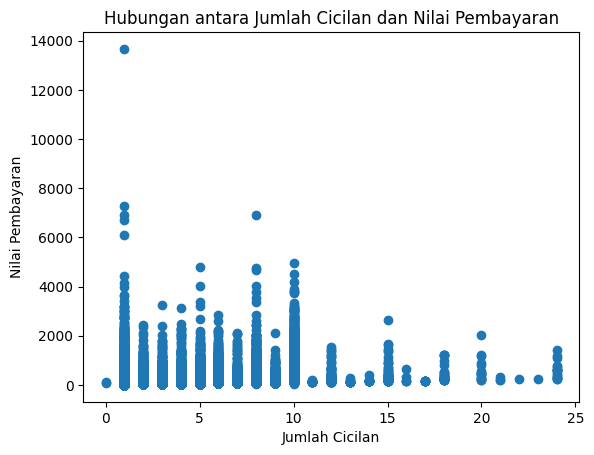

In [123]:
plt.scatter(payment['payment_installments'], payment['payment_value'])
plt.xlabel('Jumlah Cicilan')
plt.ylabel('Nilai Pembayaran')
plt.title('Hubungan antara Jumlah Cicilan dan Nilai Pembayaran')
plt.show()

### Pertanyaan 2: 

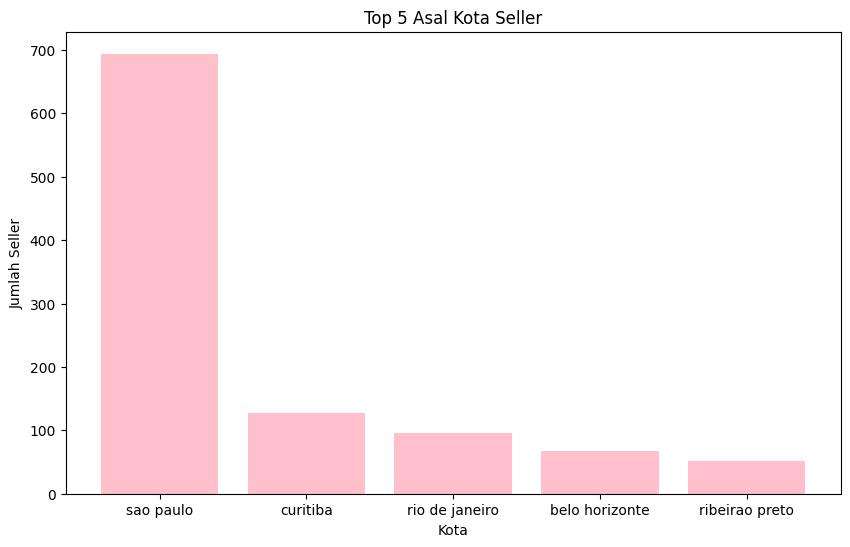

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(limakota.index, limakota.values, color='pink')
plt.title('Top 5 Asal Kota Seller')
plt.xlabel('Kota')
plt.ylabel('Jumlah Seller')
plt.show()

### Pertanyaan 3 :

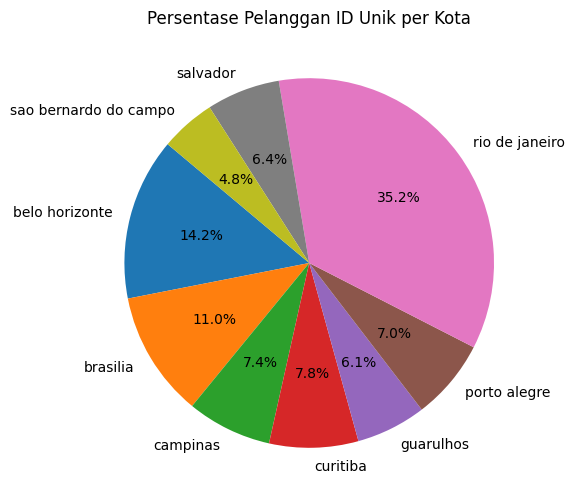

In [72]:
# Pilih 10 kota untuk dianalisis
kota_list = ['sau paolo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba', 'campinas', 'porto alegre', 'salvador', 'guarulhos', 'sao bernardo do campo']

# Menghitung jumlah pelanggan unik untuk setiap kota
jumlah_pelanggan_per_kota = customer[customer['customer_city'].isin(kota_list)].groupby('customer_city')['customer_unique_id'].nunique()

# Plotting diagram lingkaran
plt.figure(figsize=(10, 6))
plt.pie(jumlah_pelanggan_per_kota, labels=jumlah_pelanggan_per_kota.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Pelanggan ID Unik per Kota')
plt.show()

### Pertanyaan 4 :

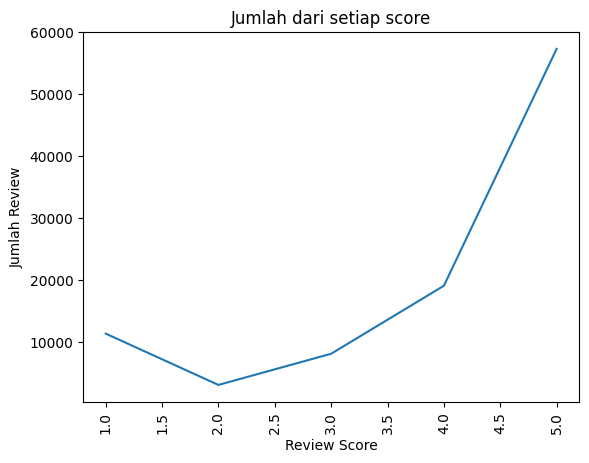

In [99]:
score = review.groupby('review_score')
review_counts = score.size()

plt.plot(review_counts.index, review_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Review Score')
plt.ylabel('Jumlah Review')
plt.title('Jumlah dari setiap score')

plt.show()

### Pertanyaan 5 :

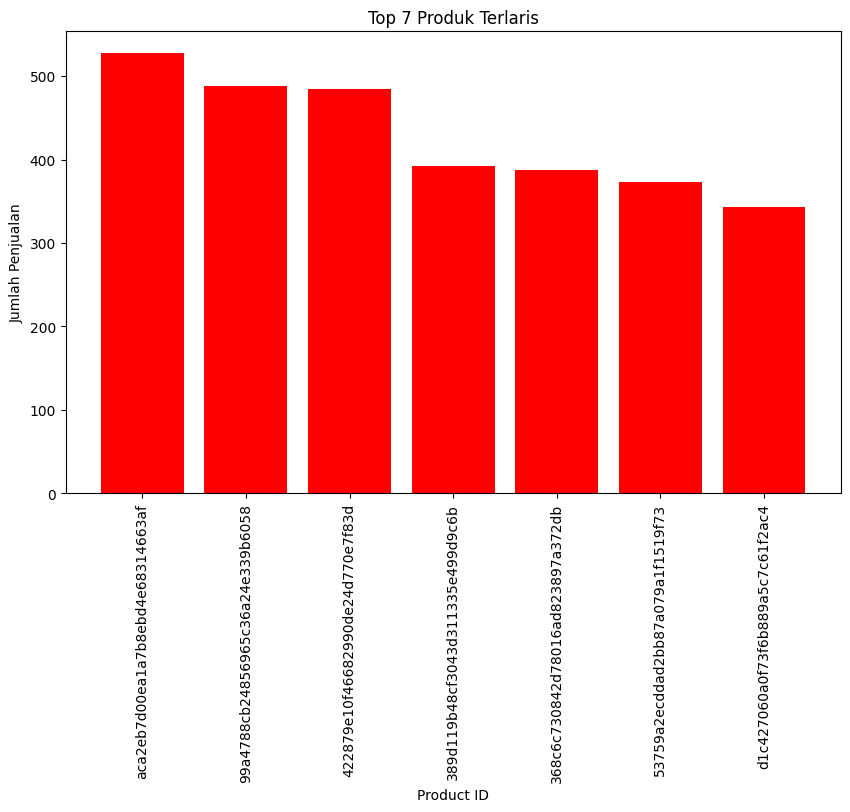

In [127]:
# Visualisasi dengan grafik batang
plt.figure(figsize=(10, 6))
plt.bar(produk_terlaris['product_id'], produk_terlaris['jumlah_penjualan'], color='red')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Jumlah Penjualan')
plt.title('Top 7 Produk Terlaris')
plt.show()

## Conclusion

#### Conclution pertanyaan 1
Berdasarkan data diatas dalam scatter plot, dapat dilihat pola distribusi titik-titik antara jumlah cicilan dan nilai pembayaran. Pola tersebut mungkin linear (sejajar), non-linear, atau tidak jelas.

#### Conclution pertanyaan 2
Berdasarkan data diatas, terdapat banyak penjual yang berasal dari kota yang sama. dan berdasarkan diagram batang diatas, dapat dilihat bahwa 5 kota teratas asal penjual yaitu Sao Paulo (694 seller), Curitiba (127 orang), Rio de Janeiro (96 orang), Belo Horizonte (68 orang) dan Ribeirao Preto (52 orang)

#### Conclution pertanyaan 3
  Mengidentifikasi kota-kota yang memiliki jumlah pelanggan unik yang tinggi mungkin mengindikasikan pusat atau fokus kegiatan bisnis.

#### Conclution pertanyaan 4
dapat disimpulkan bahwa jumlah dari score yang didapatkan dari setiap review adalah sebagai berikut:
score 1:  11424 review
score 
:2  315  review1score 
:
3  81  review7score 9:
   19 review1score 4:2
    5 review7328nyaan 2


#### Conclution pertanyaan 5 
berdasarkan data diatas, menghasilkan 7 produk terlaris berdasarkan jumlah penjualan